# Dealing with Missing Values

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# load the data
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


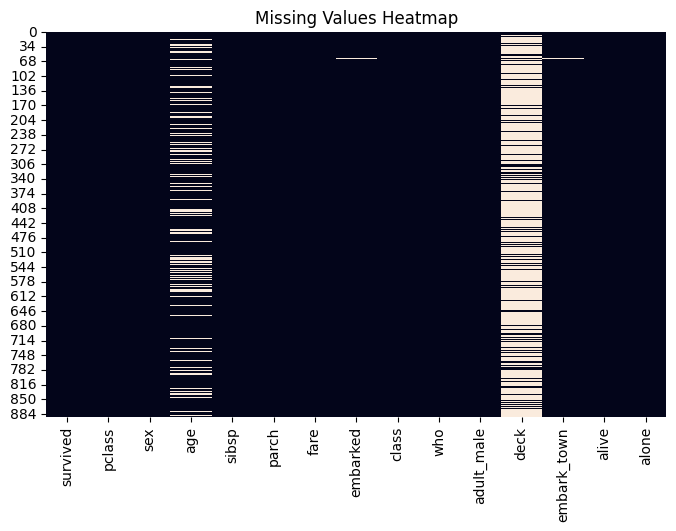

In [32]:
# missing values heatmap
plt.figure(figsize=(8,5))
plt.title('Missing Values Heatmap')
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [33]:
# calculate missing values
print("----------------------------------------")
print(f"Missing values in each column:\n{data.isnull().sum().sort_values(ascending=False)}")
print("----------------------------------------")
print(f"Percentage of missing values in each column:\n{round(data.isnull().sum() / len(data) * 100, 2).sort_values(ascending=False)}")

----------------------------------------
Missing values in each column:
deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64
----------------------------------------
Percentage of missing values in each column:
deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
fare            0.00
parch           0.00
sibsp           0.00
class           0.00
adult_male      0.00
who             0.00
alive           0.00
alone           0.00
dtype: float64


In [34]:
# Mean of age to fill all missing values
median = data['age'].median()
data['age'] = data['age'].fillna(median)

In [35]:
# drop deck column
data.drop('deck', axis=1, inplace=True)

In [36]:
data['embarked'].mode()

0    S
Name: embarked, dtype: object

In [37]:
# replacing embarked missing values with mode
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

C:\Users\sufwa\AppData\Local\Temp\ipykernel_17496\1553459308.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)


In [38]:
# replacing embarked_town missing values with mode
data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)

C:\Users\sufwa\AppData\Local\Temp\ipykernel_17496\2124779599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)


In [39]:
data.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

---
## Imputing missing using sk-learn

In [40]:
# import libraries
from sklearn.impute import SimpleImputer

In [41]:
# load the data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [44]:
# impute age column using simpleimputer from sklearn
imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df[['age']])

In [45]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

### Multivariate Imputation

In [63]:
# load the data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [50]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# impute age column using iterative imputer from sklearn
imputer = IterativeImputer(max_iter=20, n_nearest_features=5)
df['age'] = imputer.fit_transform(df[['age']])

In [60]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

### Using forward and backward fill

In [54]:
# using forward fill
df['age'] = df['age'].ffill()

In [59]:
# using backward fill
df['age'] = df['age'].bfill()

## Using KNN imputer

In [67]:
# load the data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df['age'] = imputer.fit_transform(df[['age']])

In [70]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [69]:
# drop all missing values
df.dropna(inplace=True)